<a href="https://colab.research.google.com/github/lmas3009/Machine-Learning-Using-Udacity/blob/main/Fashion_Mnist_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.6MB 3.4MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [ ]:
from __future__ import absolute_import,division,print_function

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.3.0


In [ ]:
dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset = dataset['train'],dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHL0C7B/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHL0C7B/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_name=['T-shrit/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples
print(num_train,num_test)

60000 10000


In [ ]:
def normalize(image,labels):
  image = tf.cast(image,tf.float32)
  image /= 255
  return image,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

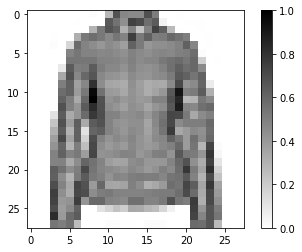

In [ ]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

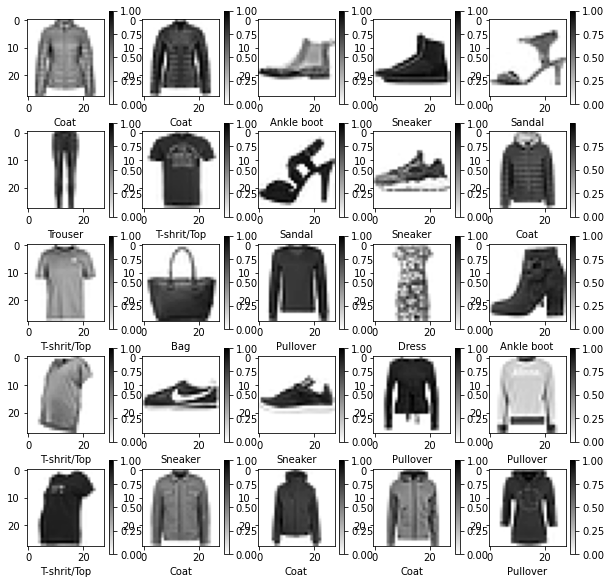

In [ ]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.xlabel(class_name[label])
  i+=1
plt.show()

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(128,activation=tf.nn.relu),
      tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [ ]:
batch_size=32
train_dataset = train_dataset.repeat().shuffle(num_train).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [ ]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train/batch_size))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4931 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3692 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3360 - accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3077 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2923 - accuracy: 0.8924


In [ ]:
test_loss,test_acc = model.evaluate(test_dataset,steps=math.ceil(num_test/32))

313/313 [==============================] - 2s 5ms/step - loss: 0.3583 - accuracy: 0.8736


In [ ]:
for image,label in test_dataset.take(1):
  image= image.numpy()
  label = label.numpy()
  predic = model.predict(image)
predic.shape

(32, 10)

In [ ]:
predic[0]

array([7.5697681e-05, 4.3732830e-06, 3.0820275e-02, 9.9934796e-06,
       8.8924432e-01, 1.7062858e-09, 7.9823248e-02, 8.1063911e-10,
       2.2008029e-05, 9.4145705e-08], dtype=float32)

In [ ]:
np.argmax(predic[0])

4

In [ ]:
label[0]

4